# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [65]:
##---------Type the code below this line------------------##
# Data has been loaded form local system in CSV file format

## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
# Importing important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Configuring Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

# Reading the dataset
df = pd.read_csv('/content/hotel_booking.csv')

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in df.columns:
        df[column] = df[column].astype(str)

# Verify the changes in data types
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


In [8]:
# Reloading dataset to get is original feature data type
df = pd.read_csv('/content/hotel_booking.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.shape

(119390, 36)

In [11]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [12]:
##---------Type the code below this line------------------##

# Checking for duplicate data
df.duplicated().sum()

0

In [13]:
# Checking Missing Data
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#Checking for Data Inconsistency
for column in df.columns:
    print(column, ":", df[column].unique())

hotel : ['Resort Hotel' 'City Hotel']
is_canceled : [0 1]
lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 2

Above data seems to be consistence and there is no data inconsistencies found

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [15]:
##---------Type the code below this line------------------##

# Removing duplicate values from above data
df.drop_duplicates(inplace=True, keep='first')

In [16]:
# Imputing missing data
# Calculate the missing values percentage in all features of dataset
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [17]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

From above result we can say that only children has missing value of 0.00335% which is very less and most of data in under children has 0 value, so we will be replacing NaN value for children feature with 0

In [18]:
# filling missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column after imputation
df['children'].isnull().sum()

0

Identifying Directly related feature with target Feature and removing them to prevent Data Leakage

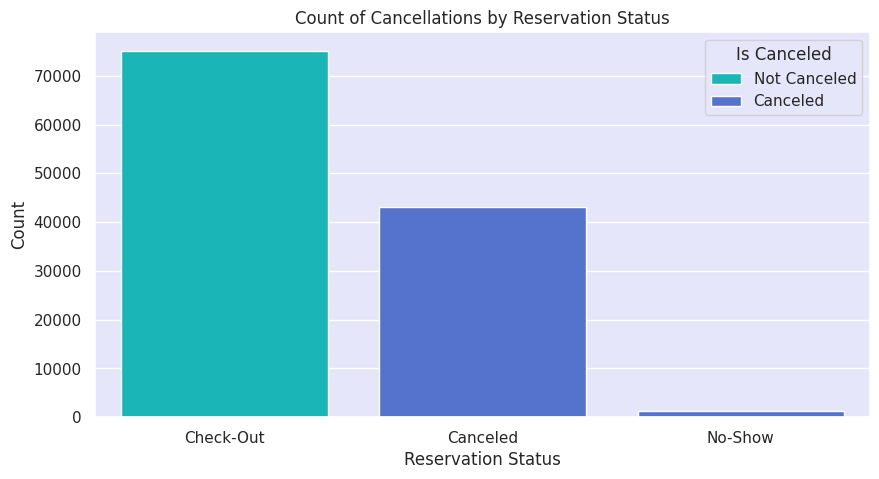

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

From above bar graph we can conclude that  all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0)
So, we will drop 'reservation_status' feature to prevent data leakage

In [20]:
# Drop the `reservation_status` feature
df = df.drop(['reservation_status'], axis=1)

In [21]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days

df[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


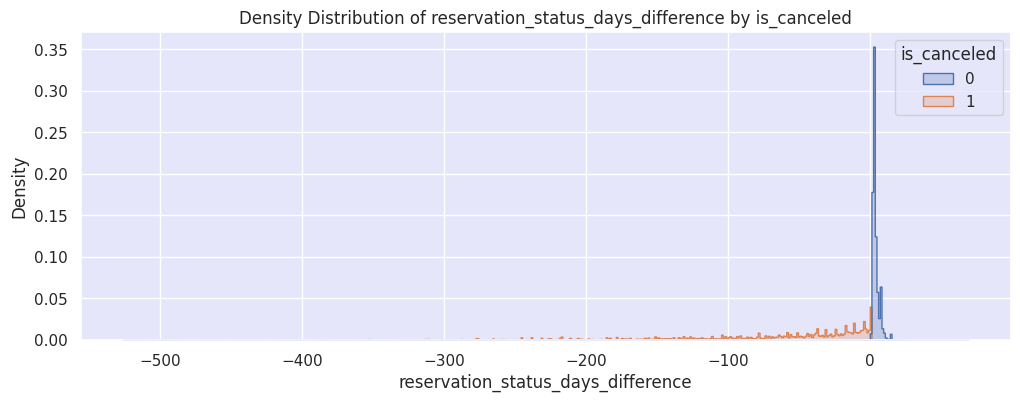

In [22]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [23]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

0    74460
Name: is_canceled, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

1    42137
Name: is_canceled, dtype: int64


The reservation_status_days_difference feature is the number of days between the arrival date and the date at which the reservation status was last updated.

1.   Positive values indicate that the reservation status was updated after the arrival date
2.   Negative values indicate that the reservation status was updated before the arrival date
So, we will remove both the reservation_status_date and the reservation_status_days_difference features from the model to prevent data leakage



In [24]:
# Removing 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

'assigned_room_type' and 'arrival_date_year'  is considered as an irrelevant feature which will not be used for predicting target variable(Cancellation).
So, we will drop 'assigned_room_type' and 'arrival_date_year'

In [25]:
df = df.drop(['assigned_room_type'], axis=1)
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Our dataset has few catergorical column with high cardinality (large number of categories), this data will not be useful for predicting target variable as it do not contain lot of information for predection.
So, we will drop feature with high cardinality

In [26]:
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card']
unique_categories = df[high_cardinality_features].nunique()
unique_categories

country            177
agent              333
company            352
name             81503
email           115889
phone-number    119390
credit_card       9000
dtype: int64

In [27]:
df = df.drop(['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'], axis=1)

Handling outlier data of 'adr', 'adults', 'children' and 'babies' feature

In [28]:
# replacing negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

## 3.3 Encode categorical data

In [29]:
##---------Type the code below this line------------------##

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               

In [30]:
# Creating copy of dataset to use it for EDA
df_eda = df.copy()

# coverting 'arrival_date_month' to numerical values using lambda function
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encoding the categorical columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_year               118985 non-null  int64  
 3   arrival_date_month              118985 non-null  int64  
 4   arrival_date_week_number        118985 non-null  int64  
 5   arrival_date_day_of_month       118985 non-null  int64  
 6   stays_in_weekend_nights         118985 non-null  int64  
 7   stays_in_week_nights            118985 non-null  int64  
 8   adults                          118985 non-null  int64  
 9   children                        118985 non-null  float64
 10  babies                          118985 non-null  int64  
 11  is_repeated_guest               118985 non-null  int64  
 12  previous_cancell

## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)



1.   There was no duplicated column in our dataset but we have used df.drop_duplicates() function to double sure our outcomes
2.   There was 4 missing value in 'children' feature in above dataset and majority of value in 'children' feature (110796) were having 0, so we have imputed missing value with 0 in this feature using fillna function.
3. Feature in above dataset has been converted to required data format, features which were irrelevent for prediciton of output variable has been droped, Features which were directly related with output varialble were dropped to prevent data leakage and categorical columns which had high cardinality were dropped as it consist very less information for prediction output variable because of present of huge number of class within it.
4. Outlier has been also properly handled in dataset



## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [31]:
# Seperating data into features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [32]:
X.shape

(118985, 47)

In [33]:
y.shape

(118985,)

**Observation**


1.   Dataset has been seperated into X and y. X consist of all input features and y consist of output feature(is_canceled)
2.   Categorical feature in dataset has been One Hot Encoded.
3. Shape of X is (118985, 47) and Shape of y is (118985,)



# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

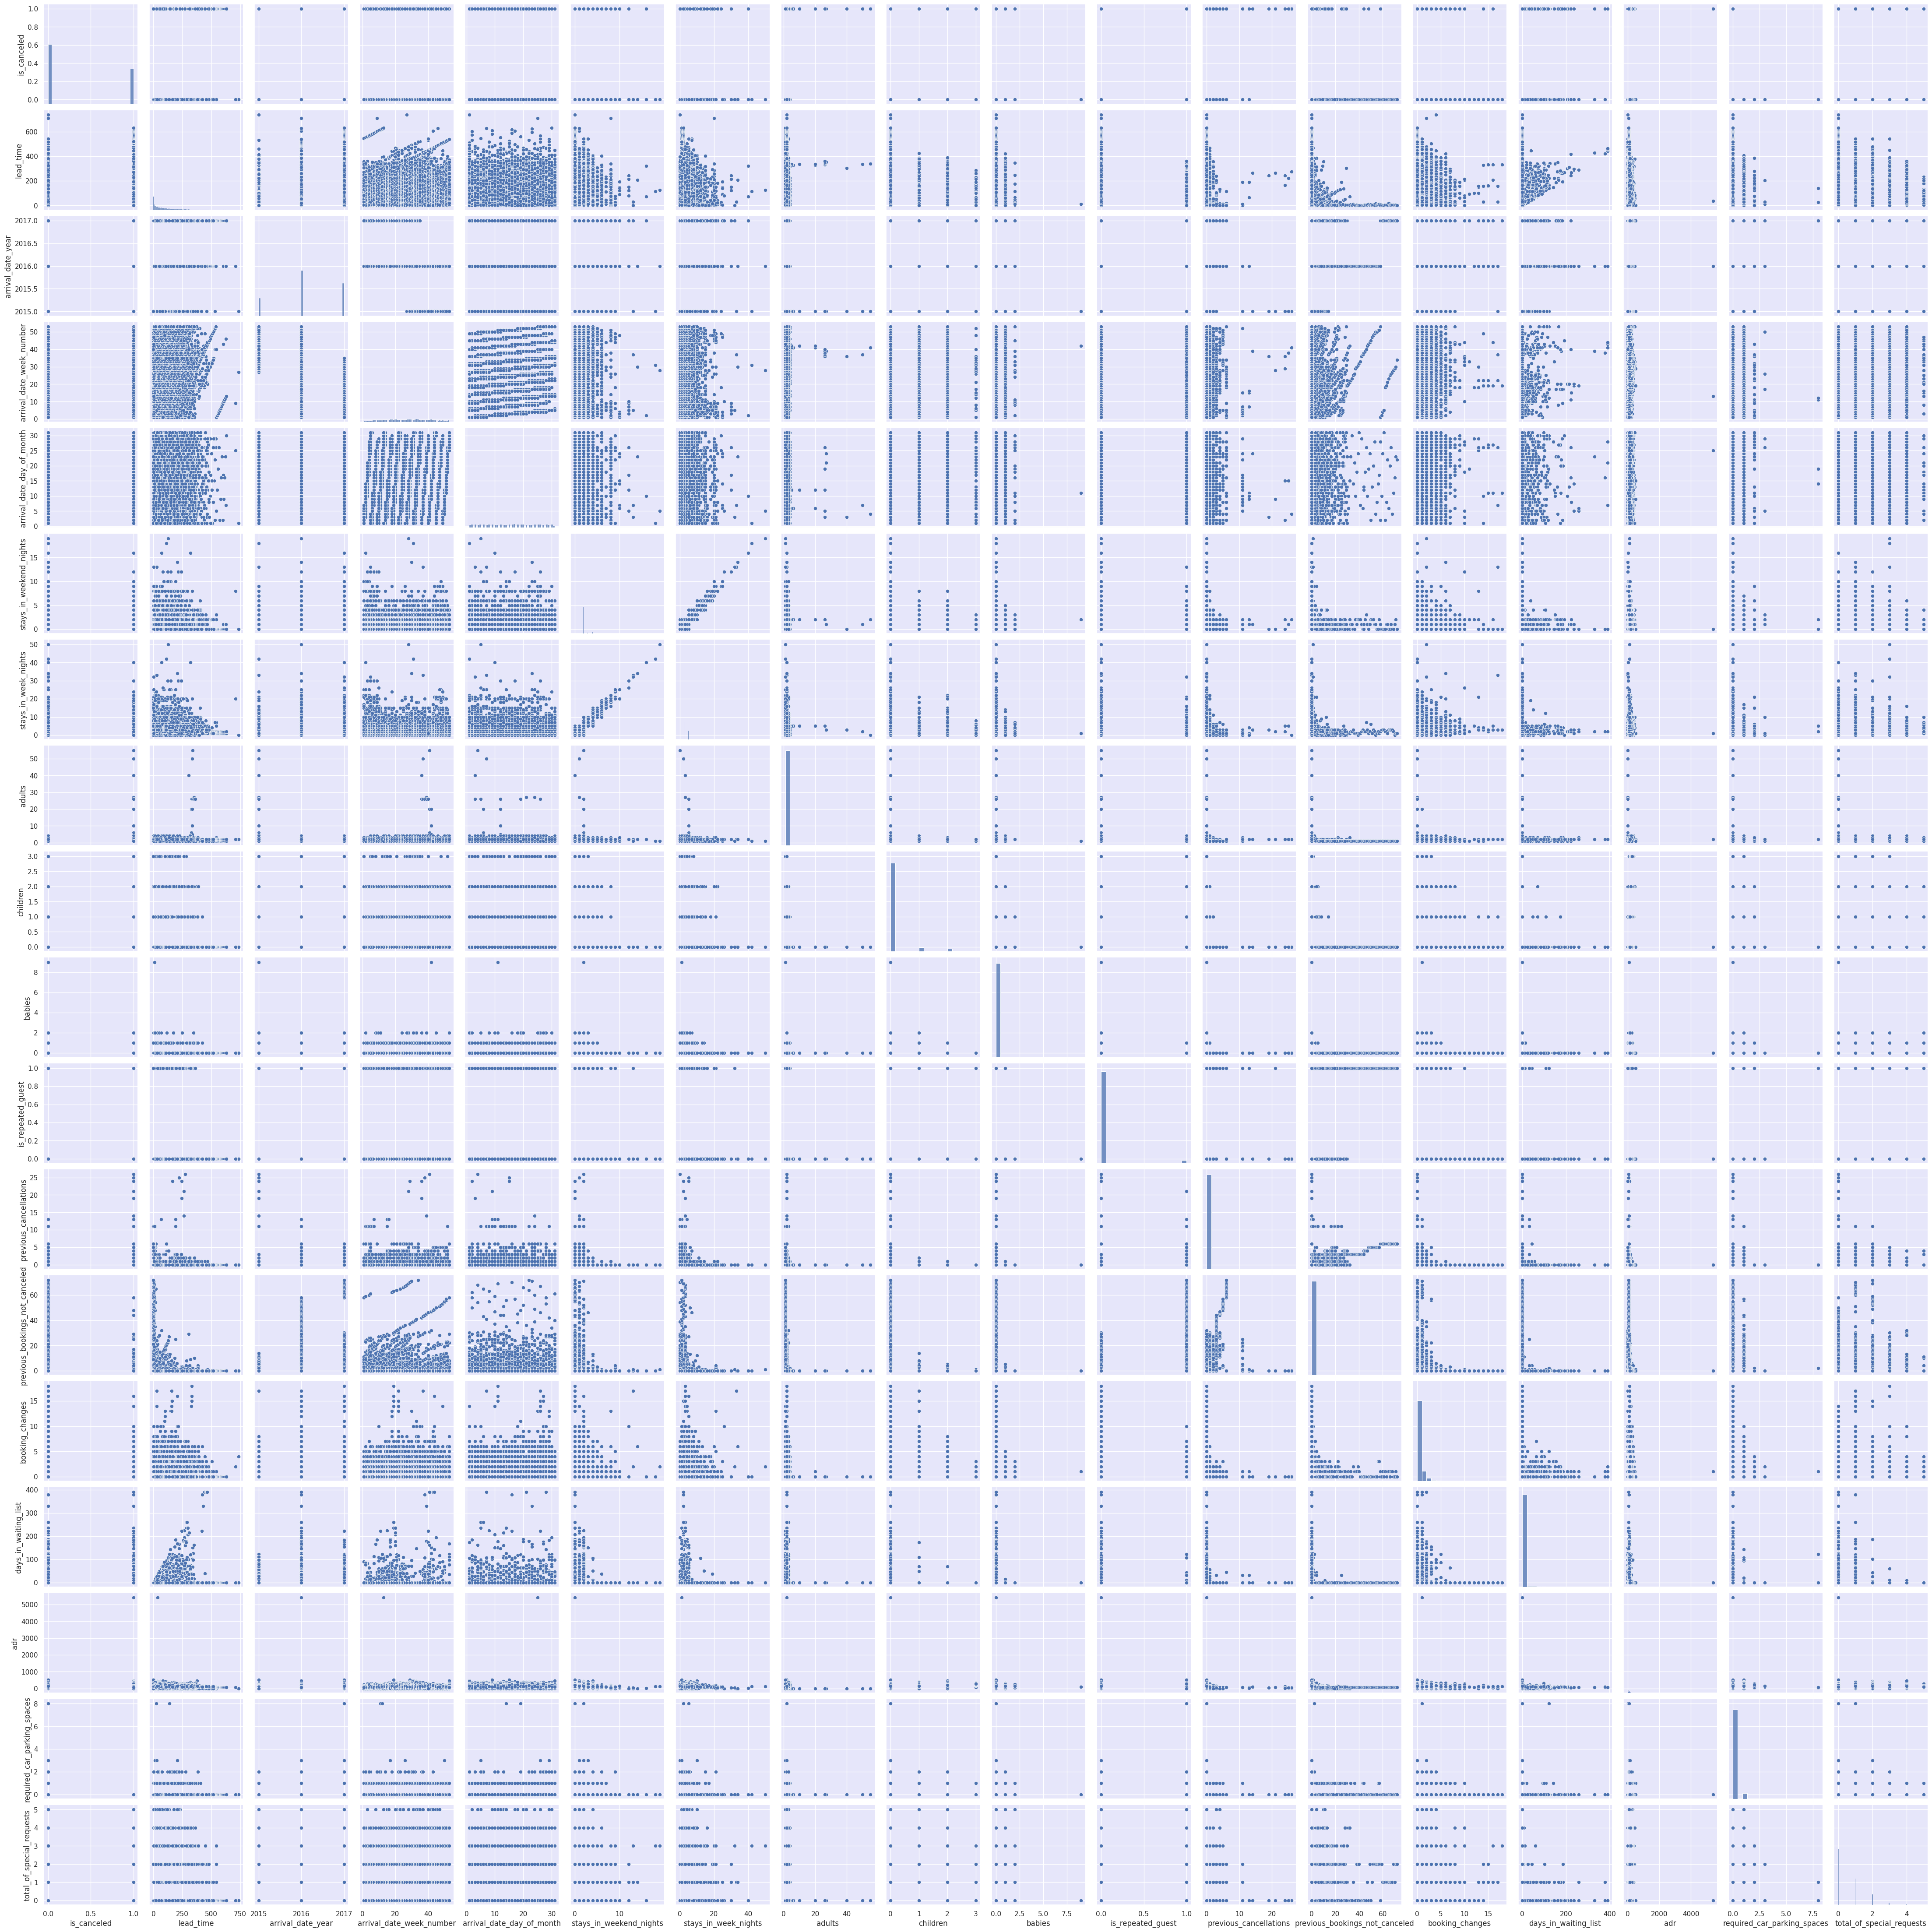

In [34]:
sns.pairplot(df_eda)
# display the plot
plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [35]:
##---------Type the code below this line------------------##
corr = df.corr()[:1]
corr_asc = corr.sort_values(by='is_canceled', ascending=False,axis=1).iloc[:,:6]
corr_desc = corr.sort_values(by='is_canceled', ascending=True,axis=1).iloc[:,:6]


In [36]:
corr_asc

,is_canceled,deposit_type_Non Refund,lead_time,market_segment_Groups,distribution_channel_TA/TO,customer_type_Transient
is_canceled,1.0,0.48204,0.292988,0.222255,0.176111,0.133253


In [37]:
corr_desc

,total_of_special_requests,required_car_parking_spaces,market_segment_Direct,distribution_channel_Direct,booking_changes,hotel_Resort Hotel
is_canceled,-0.235267,-0.195864,-0.154466,-0.15166,-0.144892,-0.137283


<Axes: >

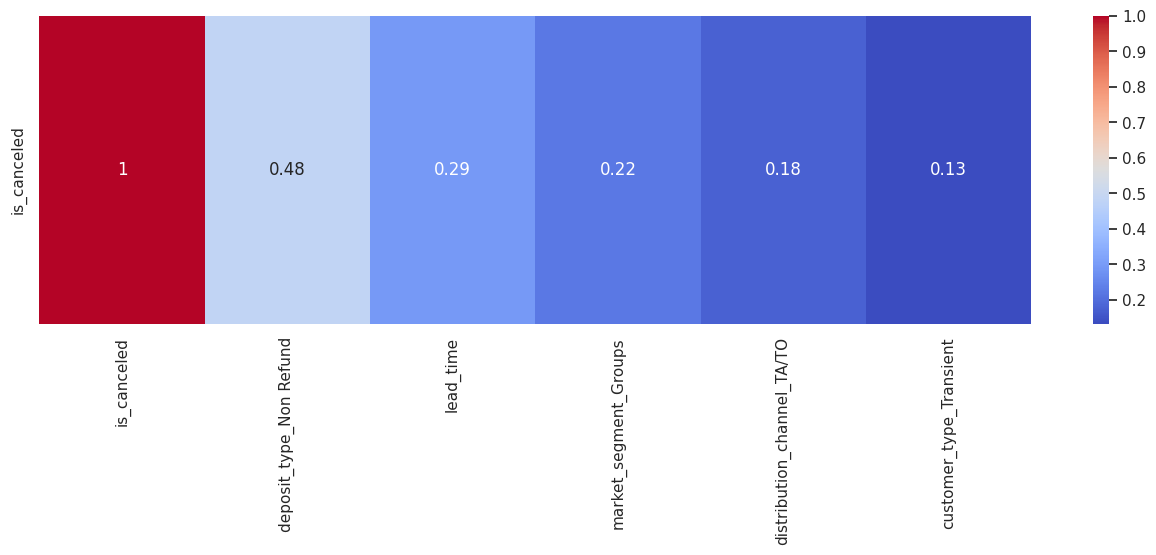

In [38]:
plt.figure(figsize=(16,4))
sns.heatmap(corr_asc,annot=True, cmap='coolwarm')

<Axes: >

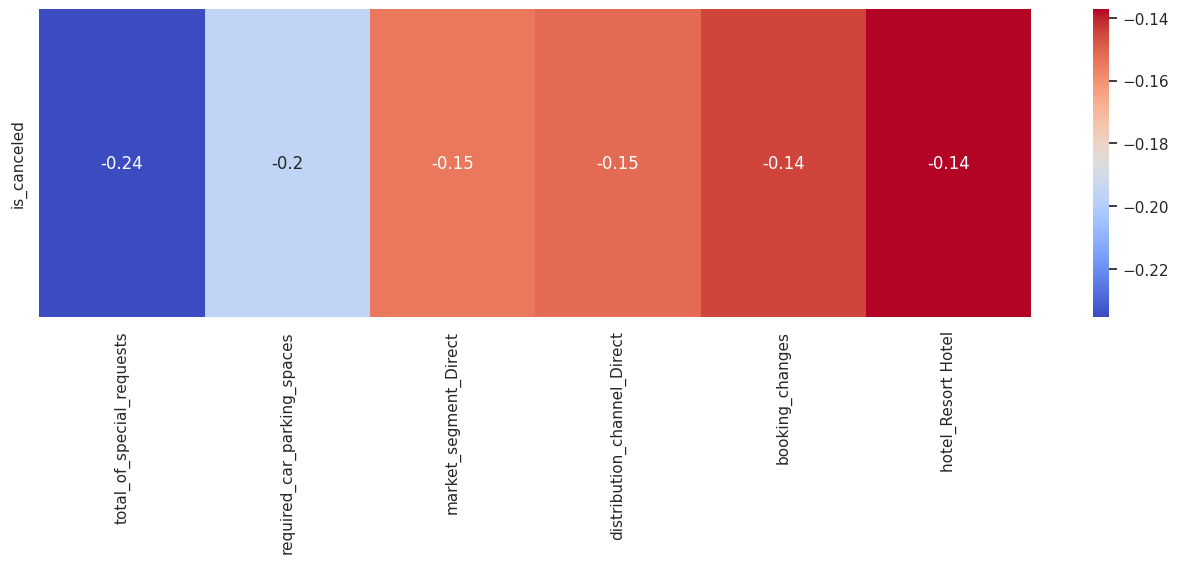

In [39]:
plt.figure(figsize=(16,4))
sns.heatmap(corr_desc,annot=True, cmap='coolwarm')

**Observation:**
From above correlation chart and heat map we can say that top 5 following feature plays most important role in prediction of output feature(is_canceled):

1.   deposit_type_Non_Refund - Its directly proportional to output feature
2.   lead_time -Its directly proportional to output feature

3.   total_of_special_requests - Its Indirectly proportional to output feature
4.   market_segment_Groups -Its directly proportional to output feature

5.   required_car_parking_spaces -Its Indirectly proportional to output feature








# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target/other variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Strenth of Association

(From the above 5 you are required to use only any <b>two</b>)



Score: 3 Marks

In [40]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

# Calculating Mutual Information
mi_scores = mutual_info_classif(df.drop('is_canceled', axis=1), df['is_canceled'])

# Conducting Chi-Squared test
chi2_scores, p_values = chi2(df.drop('is_canceled', axis=1), df['is_canceled'])

# Combine scores and p-values into a single array
combined_scores = np.column_stack((mi_scores, p_values))

# Rank features based on Mutual Information scores and p-values from Chi-Squared test
feature_names = df.drop('is_canceled', axis=1).columns
sorted_indices_mi = np.argsort(mi_scores)[::-1]  # Sort descending for MI
sorted_indices_chi2 = np.argsort(p_values)  # Sort ascending for Chi-Squared p-values

# Identify the top 5 features
top_features = []
for i in range(5):
    mi_index = sorted_indices_mi[i]
    chi2_index = sorted_indices_chi2[i]
    feature_mi = feature_names[mi_index]
    feature_chi2 = feature_names[chi2_index]
    top_features.append((feature_mi, mi_scores[mi_index], p_values[chi2_index]))

# Print the top 5 features
print("Top 5 significant features:")
for i, (feature, mi_score, p_value) in enumerate(top_features, start=1):
    print(f"{i}. Feature: {feature}, Mutual Information Score: {mi_score:.4f}, Chi-Squared p-value: {p_value:.4f}")

Top 5 significant features:
1. Feature: deposit_type_Non Refund, Mutual Information Score: 0.1319, Chi-Squared p-value: 0.0000
2. Feature: lead_time, Mutual Information Score: 0.0823, Chi-Squared p-value: 0.0000
3. Feature: adr, Mutual Information Score: 0.0806, Chi-Squared p-value: 0.0000
4. Feature: previous_cancellations, Mutual Information Score: 0.0410, Chi-Squared p-value: 0.0000
5. Feature: total_of_special_requests, Mutual Information Score: 0.0395, Chi-Squared p-value: 0.0000


## 5.2 Report observations

Top 5 Significant feature for data set after conclusion for Mutual Information and chi Square test are:


1. ***deposit_type_Non Refund***:  Strongly associated with booking behavior, indicating distinct preferences among customers opting for non-refundable deposits.

2. ***lead_time***:  Duration between booking and arrival, highlighting its importance in predicting customer behavior.
3. ***adr***: Reflects customer segments or preferences based on booking rates.

4. ***previous_cancellations***: History of cancellations impacts future booking behavior, suggesting potential customer concerns or preferences.

5. ***total_of_special_requests***: Indicates customer preferences for customized services, influencing booking decisions.


Score 1 mark

# 6. Implement Machine Learning Techniques

Use any 2 ML tasks
1. Classification  

2. Clustering  

3. Association Analysis

4. Anomaly detection

You may use algorithms included in the course, e.g. Decision Tree, K-means etc. or an algorithm you learnt on your own with a brief explanation.
A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

In [41]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## 6.1 ML technique 1 + Justification

In [42]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)
# Hyperparameter tuning
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [43]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [44]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [45]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [49]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     59897
           1       0.73      0.86      0.79     35291

    accuracy                           0.83     95188
   macro avg       0.82      0.84      0.83     95188
weighted avg       0.84      0.83      0.83     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.84     14974
           1       0.70      0.82      0.76      8823

    accuracy                           0.80     23797
   macro avg       0.79      0.81      0.80     23797
weighted avg       0.81      0.80      0.81     23797



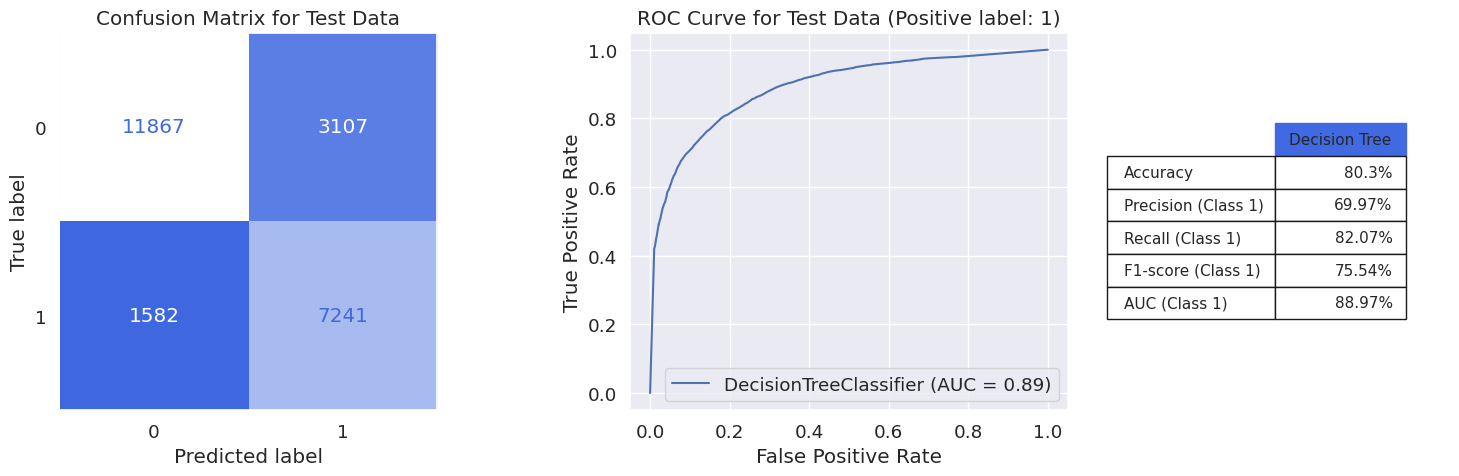

In [50]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

In [51]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,80.3%
Precision (Class 1),69.97%
Recall (Class 1),82.07%
F1-score (Class 1),75.54%
AUC (Class 1),88.97%


## 6.2 ML technique 2 + Justification

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     59897
           1       0.76      0.59      0.66     35291

    accuracy                           0.78     95188
   macro avg       0.77      0.74      0.75     95188
weighted avg       0.77      0.78      0.77     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     14974
           1       0.76      0.57      0.65      8823

    accuracy                           0.77     23797
   macro avg       0.77      0.73      0.74     23797
weighted avg       0.77      0.77      0.77     23797



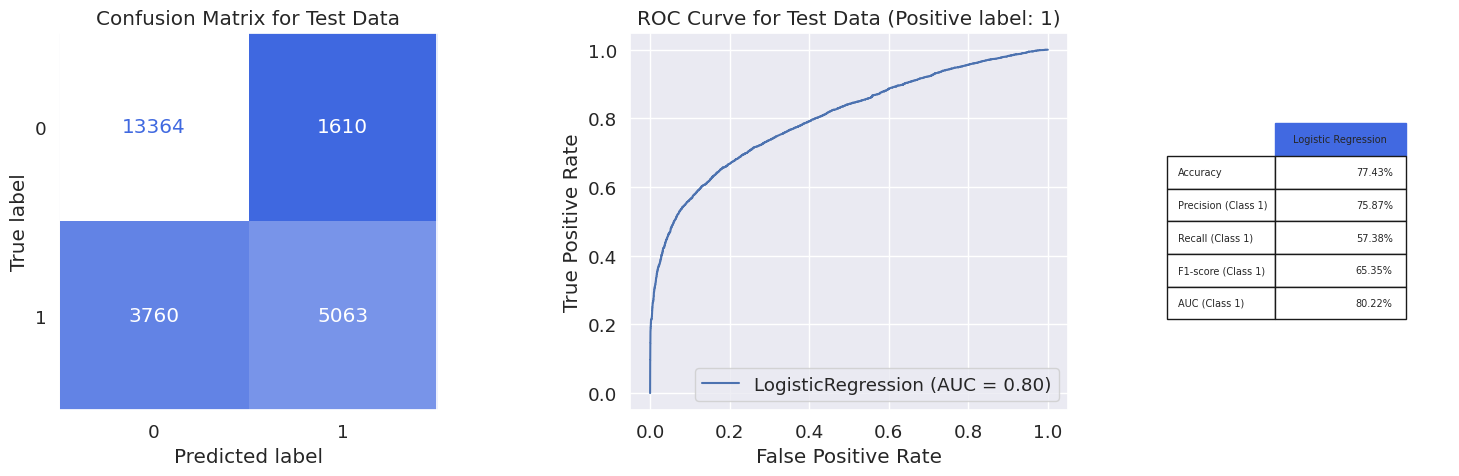

In [62]:
model_evaluation(lr_model, X_train, X_test, y_train, y_test, 'Logistic Regression')

In [64]:
# Save the final performance of logistic classifier
lr_result = metrics_calculator(lr_model, X_test, y_test, 'Logistic Regression')
lr_result

,Logistic Regression
Accuracy,77.43%
Precision (Class 1),75.87%
Recall (Class 1),57.38%
F1-score (Class 1),65.35%
AUC (Class 1),80.22%


## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [59]:
dt_result

,Decision Tree
Accuracy,80.3%
Precision (Class 1),69.97%
Recall (Class 1),82.07%
F1-score (Class 1),75.54%
AUC (Class 1),88.97%


**Decision Tree Model Performance on Test Data:**


*   The Accuracy is 80.3%, which means the model is correctly predicting whether a booking will be canceled or not about 80% of the time.
*   The Precision for class 1 (cancellations) is 69.97%, which means that 70% of result which model predicted were actually cancelled

*   The Recall for class 1 is 82.07%, which means that the model correctly identified 81% of the actual cancellations.
*   The F1-score for class 1 is 75.54%

*  The model has a good differencing power between the two classes as area under curve(AUC) for class 1 is 88.97 %.

*   As per confussion matrix there are some false positive and false negative but is number is less.
*   As metrics value of test and train are relatively close to each other indicate that model is not overfitted












In [60]:
lr_result

,Decision Tree
Accuracy,77.43%
Precision (Class 1),75.87%
Recall (Class 1),57.38%
F1-score (Class 1),65.35%
AUC (Class 1),80.22%


**Logistic Regression Model Performance on Test Data:**


*   The Accuracy is 77.43%, which means the model is correctly predicting whether a booking will be canceled or not about 77% of the time.
*   The Precision for class 1 (cancellations) is 75.87%, which means that 75% of result which model predicted were actually cancelled

*   The Recall for class 1 is 57.38%, which means that the model correctly identified 57% of the actual cancellations.
*   The F1-score for class 1 is 65.35%

*  The model has a good differencing power between the two classes as area under curve(AUC) for class 1 is 80.22 %.

*   As per confussion matrix there are some false positive and false negative but is number is less.
*   As metrics value of test and train are relatively close to each other indicate that model is not overfitted












## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

After using Decision Tree Classifier and Logistic Regression and Comparing all evaluation parameter of both model, Decision tree classifier proves to be better model with accuacy of 80.3%.

Decision Tree classifier model can be use to predict if a customer will cancel his/her booking or not which can be really helpful for Hotel industry to attract potential customer and prevent loss incurred during last minute cancellation.

Above project has been done on CRIPS-DM Methodology and has given us idea about complete life cycle of making machine learning model in stucutred manner.

From above exersice we got to know how to handle dataset with large number of features, using hyperparmeter tuning for decision tree, Comparing model and performing EDA to get insight of hotel business.

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!